# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2021**

![Images/Comic.gif](Images/Comic.gif)

---
## Clase 2: Manejo de datos faltantes

### Indice de temas
1. [Datos ruidosos](#1.-Datos-ruidosos)
    * 1.1.[Tipos de datos ruidosos](#1.1-Tipos-de-datos-ruidosos)
    * 1.2 [Datos Erróneos](#1.2-Datos-Erróneos)   
    * 1.3 [Datos faltantes](#1.2-Datos-faltantes)
    * 1.4 [Dataset: Primer mirada los datos](#1.3-Dataset:-Primer-mirada-a-los-datos)
    * 1.4.1 [Exploración](#1.4.1-Exploración)
    * 1.5 [Reconocimiento de datos ruidosos](#1.5-Reconocimiento-de-datos-ruidosos)
       * 1.5.1 [Detección las variables con valor cero del dataset](#1.5.1-Detección-las-variables-con-valor-cero-del-dataset)
       * 1.5.2 [Exploracion de las variables Bedroom2, Bathroom y Distance](#1.5.2-Exploracion-de-las-variables-Bedroom2,-Bathroom-y-Distance)
       * 1.5.3 [Ejercicio](#1.5.3-Ejercicio)
    * 1.6 [Reconocimiento de datos faltantes](#1.6-Reconocimiento-de-datos-faltantes)    
    * 1.7 [Librería Missingno](#1.7-Librería-Missingno)
    * 1.8 [Razones que contribuyen a tener datos faltantes](#1.8-Razones-que-contribuyen-a-tener-datos-faltantes)
    * 1.9 [Detección de correlaciones](#1.9-Detección-de-correlaciones)
       * 1.9.1 [Detección de correlaciones usando matrix plot](#1.9.1-Detección-de-correlaciones-usando-matrix-plot)
       * 1.9.2 [Detección de correlaciones usando Heatmap](#1.9.2-Detección-de-correlaciones-usando-Heatmap)
2. [Tratamiento del valor faltante](#2.-Tratamiento-del-valor-faltante)
    * 2.1.[Eliminacion de datos faltantes](#2.1-Eliminacion-de-datos-faltantes)
        * 2.1.1[Eliminación de casos completos](#2.1.1-Eliminación-de-casos-completos)
        * 2.1.2[Eliminación de variables](#2.1.2-Eliminación-de-variables)
    * 2.2 [Técnicas de imputación](#2.2-Técnicas-de-imputación)
        * 2.2.1 [Técnicas Básicas](#2.2.1-Técnicas-básica)
        * 2.2.2 [Imputar con el valor mas frecuente](#2.2.2-Imputar-con-el-valor-mas-frecuente)
        * 2.2.3 [Ejercicio](#2.2.3-Ejercicio)
    * 2.3 [Técnicas de imputacion avanzadas](#2.3-Técnicas-de-imputacion-avanzadas)
        * 2.3.1 [K-Nearest Neighbor Imputation](#2.3.1-K-Nearest-Neighbor-Imputation)
        * 2.3.2 [Multivariate feature imputation](#2.3.2-Multivariate-feature-imputation)
        * 2.3.3 [Ejercicio](#2.3.3-Ejercicio)
        * 2.3.4 [Otros métodos de imputación](#2.3.4-Otros-métodos-de-imputación)




## 1. Datos ruidosos

Una de las conclusiones más importantes de trabajar con información es que los datos nunca se organizan, ni se recolectan de forma simple. Los datos del mundo real, al combinar diferentes características y calificaciones de objetos y sujetos muchas veces contienen errores,  lo que requiere una limpieza significativa (y, a menudo, experiencia de dominio) para ser utilizables. Esto es lo que se refiere con ruido en los datos.

Casi todos los conjuntos de datos contienen algo de ruido, y cuanto menos ruido haya, mejor ("más limpio") será el conjunto de datos. Algunos tipos de ruido son más fáciles de corregir que otros. A veces, eliminar el ruido por completo es simplemente imposible y todo lo que puede hacer es volver a muestrear o esperar lo mejor, teniendo en cuenta que en procesamiento de datos, <span style="color:FireBrick">**cuando entra basura, sale basura.**</span>

![Images/DatosRuidosos.png](Images/DatosRuidosos.png)

### 1.1 Tipos de datos ruidosos

* El <span style="color:FireBrick">**dato erróneo**</span>  es un dato recolectado con algun error, que lo separa de la generalidad. Debe ser inspeccionado y tratado especialmente para determinar si es un <span style="color:FireBrick">**ruido**</span> o un dato importante con baja probabilidad de ocurrir, es decir un  <span style="color:FireBrick">**dato atípico**</span> o <span style="color:FireBrick">**outlier**</span>.

* El <span style="color:FireBrick">**dato faltante**</span> es el un dato que no esta registrado en la database. Dependiendo como se hayan recolectado los datos y escrito el archivo de datos, pueden estar marcados con un <span style="color:FireBrick">**NaN**</span>, o con un número fuera de rango, como <span style="color:FireBrick">**0**</span> o <span style="color:FireBrick">**-1**</span>. Es muy importante reconocer la codificación de datos faltantes, para no confundirlos con un dato válido recolectado. 



### 1.2 Datos Erróneos

Los datos erróneos se dividen en <span style="color:FireBrick">**datos atípicos**</span> y <span style="color:FireBrick">**datos mal codificados**</span>.

Los <span style="color:FireBrick">**datos atípicos**</span> son datos reales, sin embargo, pueden producir demasiada palanca sobre los estadisticos de tendencia central y desviacion, lo cual los hace candidatos a ser retirados del dataset. 

Los <span style="color:FireBrick">**datos mal codificados**</span> son la fuente de error mas comun, que en muchos casos no puede ser detectada. Es importante detectar cuando los datos faltantes fueron codificados como valores fuera de rango, por ejemplo el valor <span style="color:FireBrick">**cero**</span>. Este error suele aparecer cuando se mezclan databases con distinta codificacion de datos faltantes



### 1.3 Datos Faltantes

Los datos faltantes se dividen en <span style="color:FireBrick">**datos perdidos**</span> y <span style="color:FireBrick">**datos inexistentes**</span>. 

* Un <span style="color:FireBrick">**dato perdido**</span> es un dato que uno sabe que existe pero dada una recolección fallida o incompleta, no se conoce su valor.

* Un  <span style="color:FireBrick">**dato inexistente**</span> es un dato faltante, por lo cual es ruido, pero a la vez, no lo es, pues no existe. Esto es, no puede ser recolectado. 

Python no reconoce la diferencia, por lo cual uno debe ser muy cauteloso cuando trabaja con datos de ambas clases. Al leer un archivo con espacios en blanco, automáticamente asigna a ese dato un <span style="color:FireBrick">**NaN**</span> numérico con capacidad de ser imputado. 



Sin embargo,  en Python existe el objeto <span style="color:FireBrick">**None**</span>, el cual es un single null datatype. El dato <span style="color:FireBrick">**NaN**</span> puede ser usado como valor numérico en operaciones matematicas, mientras que <span style="color:FireBrick">**None**</span> no, o al menos no debería.

* <span style="color:FireBrick">**NaN**</span> es un valor numérico, definido en IEEE 754 floating-point standard. 

* <span style="color:FireBrick">**None**</span> es un internal Python type (NoneType) y es mas parecido al ''no existente'' o "vacio" que al  "numerically invalid" en este contexto.

Porque no puede usarse <span style="color:FireBrick">**None**</span> como el dato nulo de R? porque Numpy y Pandas no propagan estos datos a traves de operaciones aritméticas, y para evitar usarlo en un algoritmo hay que testear cada dato para ver si es None. 


In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
s = pd.Series([1, 2, 3])
s.loc[0] = None
s

In [ ]:
s = pd.Series(["a", "b", "c"])
s.loc[0] = None
s.loc[1] = np.nan
s

### 1.3 Dataset: Primer mirada a los datos

Este es el punto en el que entramos en la parte de la ciencia de datos que necesita mucho de la "intuición de datos", que consiste en "mirar realmente sus datos y tratar de averiguar por qué son así y cómo esto afecta el análisis ". 

Puede ser una parte frustrante de la ciencia de datos, especialmente si se es nuevo en el campo y no se tiene mucha experiencia. 

<span style="color:FireBrick">**Para lidiar con los valores erróneos**</span>, hay que estudiar las distribuciones de las variables y detectar los valores atípicos, teniendo en cuenta la forma de recolección de los datos. Un dato atípico puede ser un valor posible de una variable con cola pesada, o puede ser un error al recolectar los datos. Hay valores atípicos que enmascaran valores faltantes.

<span style="color:FireBrick">**Para lidiar con los valores perdidos**</span>, es necesario usar la intuición para averiguar por qué falta el valor. Una de las preguntas más importantes que puede hacerse para ayudar a resolver esto es la siguiente:

- <span style="color:FireBrick">**¿Falta este valor porque no se registró o porque no existe?**</span>

Por ejemplo

- Una casa de 2 dormitorios no incluiría una respuesta para el tamaño del tercer dormitorio.


- Alguien que está siendo encuestado puede optar por no compartir sus ingresos.

Si falta un valor porque <span style="color:FireBrick">**no existe**</span> (como la altura del hijo mayor de alguien que no tiene hijos), no tiene sentido intentar adivinar cuál podría ser. Estos valores que probablemente desee mantener como NaN, o codificados por un valor constante muy lejos del rango real de la variable. 

Por otro lado, si falta un valor <span style="color:FireBrick">**porque no se registró**</span>, puede intentar adivinar cuál podría haber sido es valor basándose en los otros valores en esa columna y fila. 

En estadística, <span style="color:FireBrick">**predecir**</span> es otorgar valor a un dato que todavia no ha sido muestreado, e <span style="color:FireBrick">**imputar**</span> es estimar un valor que puede haber sido muestreado pero no se lo conoce. 



### 1.4 Exploración 

Lo primero que hago cuando obtengo un nuevo conjunto de datos es echar un vistazo a algunos de ellos. Esto me permite ver si el dataset se ha leído correctamente, y tener una idea de lo que está sucediendo con los datos. En este caso, estoy buscando para ver si veo algún valor faltante, que se representará con <span style="color:FireBrick">**NaN**</span> o <span style="color:FireBrick">**None**</span>. pero tambien tengo que observar si hay números fuera de rango, como <span style="color:FireBrick">**0**</span> o números negativos que no corresponden al rango de la variable. 

Vamos a trabajar con el dataset <span style="color:FireBrick">**Melbourne Housing Snapshot**</span>, es un conjunto reducido de información sobre ventas de propiedades, con el objeto de observar tendencias en las ventas, y predecir precios.


Carguemos las librerias necesarias para trabajar 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import plotly.express as px

#import cufflinks as cf
#import plotly.graph_objs as go
#import chart_studio.plotly as py

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Use Plotly locally
#cf.go_offline()


%matplotlib inline

Carguemos los datos

In [ ]:
melb_data = pd.read_csv('melb_data.csv')
melb_data.shape


In [ ]:

melb_data.describe()

Estudiemos la definición de las variables que vamos a tener desplegadas en columnas. Recordemos que los casos son las filas.

 Variables

- Suburb: region 

- Address: property address 

- Rooms: Number of rooms

- Price: Price in dollars

- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD

- Regionname: General Region (West, North West, North, North east …etc)

- Propertycount: Number of properties that exist in the suburb.

- Bedroom2 : Scraped # of Bedrooms (from different source)

- Bathroom: Number of Bathrooms

- Car: Number of carspots

- Landsize: Land Size

- BuildingArea: Building Size

- CouncilArea: Governing council for the area

In [ ]:

y=melb_data.sample(10,random_state=123)
print(y)

### 1.5 Reconocimiento de datos ruidosos

Parece que hay variables con valores faltantes, que han sido reconocidos por pandas como <span style="color:FireBrick">**NaN**</span>, y valores <span style="color:FireBrick">**0**</span> que podrían ser tambien datos faltantes. 

En esta muestra vemos las variables <span style="color:FireBrick">**Landsize,  BuildingArea,  YearBuilt**</span>.
con problemas potenciales

- Landsize tiene valores <span style="color:FireBrick">**0**</span>.

- BuildingArea y  YearBuilt tienen <span style="color:FireBrick">**NaN**</span>

Son estas las únicas variables con problemas? como puedo encontrar TODAS las variables que tengo que estudiar?

### 1.5.1 Detección  las variables con valor cero del dataset

In [ ]:
cols = melb_data[melb_data == 0].count(axis=0)
cols[cols > 0]


Recordemos que tenemos 13580 casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante. La pregunta a responder es: Son estos ceros valores posibles de la variable o datos faltantes codificados asi?.

Vamos a trabajar las variables Bedroom2,  Bathroom y Distance y vamos a dejar las otras como ejercicio. 

### 1.5.2 Exploracion de las variables Bedroom2,  Bathroom y Distance

### Estudiemos los tipos de propiedades SIN DORMITORIOS

In [ ]:
sns.boxplot(data=melb_data[melb_data.Bedroom2<20], x='Bedroom2', y='Type')




Recordemos que solo había 16 casos con valores cero. Y hay unit, houses y townhouses sin dormitorios. Se puede pensar que hay unidades de estilo de moderno monoambiente, donde conviven la cocina y el dormitorio. Es dificil pensar que hay casa sin dormitorios. Ese parece ser un dato faltante, pues Bedroom2 es un dato obtenido mediante la union con otra database. 

Miremos en forma conjunta la variable Rooms y la variable Bedroom2.

In [ ]:
Bedroom2 = melb_data.Bedroom2
Rooms = melb_data.Rooms
pd.crosstab(Bedroom2,Rooms)

Lamentablemente, la variable Rooms es mucho mas informativa que la variable Bedroom2. 

### Ejemplo de accion: eliminar la variable Bedroom2.

NUNCA ACCIONAR SOBRE EL DATASET ORIGINAL!!!!

In [ ]:
melb_df=melb_data.copy()
melb_df=melb_df.drop(['Bedroom2'], axis=1)
melb_df.sample(10,random_state=123)

### Estudiemos los tipos de propiedades SIN BAÑOS

In [ ]:
sns.boxplot(data=melb_data, x='Bathroom', y='Type')

In [ ]:
Bathroom = melb_data.Bathroom
pd.crosstab(Bathroom,Rooms)

### Ejemplo de accion: considerar que las propiedades que no listan baños suponen que existe al menos uno.

In [ ]:
import numpy as np
melb_df.loc[melb_df.Bathroom<1,'Bathroom']=1


cols2 = melb_df[melb_df == 0].count(axis=0)#/len(melb_df.index)
cols2[cols2 > 0]

In [ ]:
cols[cols > 0]

como podemos observar, en mi dataset editado, no está la variable bedrooms y la categoria baños no tiene ceros.

In [ ]:
melb_data.describe()

In [ ]:
melb_df.describe()

### <span style="color:FireBrick">**1.5.3 Ejercicio: Dada las columnas del dataset que tienen ceros,  decidir si son ceros válidos o son datos erróneos o datos faltantes enmascarados. Decidir acciones**</span>

 ### 1.6 Reconocimiento de datos faltantes
 
- La falta de datos puede limitar nuestra capacidad para realizar tareas importantes de ciencia de datos, como convertir tipos de datos o visualizar datos.
 
- Los datos faltantes pueden reducir el poder estadístico de nuestros modelos, lo que a su vez aumenta la probabilidad de error de tipo II. El error de tipo II es la imposibilidad de rechazar una hipótesis nula falsa.

- Los datos faltantes pueden reducir la representatividad de las muestras en el conjunto de datos.

- La falta de datos completos puede distorsionar la validez de los ensayos científicos y puede llevar a conclusiones inválidas.


Las bibliotecas de Python representan los números faltantes como <span style="color:FireBrick">**NaN**</span>, que es la abreviatura de "no es un número". Vamos a detectar qué celdas tienen valores perdidos y luego contar cuántos hay en cada columna con el comando: df.isna() y el df.info()



In [ ]:
melb_data.info()


In [ ]:
missing_values_count = melb_data.isna().sum()
missing_values_count

El dataset donde empezamos a corregir ...

In [ ]:
melb_df.isna().sum()

Hay bastantes, pero concentrados en tres variables. Veamos cual es el porcentaje de datos faltantes que tiene el dataset. 

In [ ]:
# how many total missing values do we have?
total_cells = np.product(melb_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

Solo hay un 4% de datos faltantes, concentrados en algunas variables. Usando el paquete `missingno` podemos hacer un análisis gráfico de los datos faltantes. Las cuatro variables son

Car                62

BuildingArea     6450

YearBuilt        5375

CouncilArea      1369

Y el tipo de variable es

  Car              float64
  
  BuildingArea     float64
  
  YearBuilt        float64
  
  CouncilArea      object

La imputacion de variables es diferente para variables categoricas y numericas, por lo cual es importante distinguir los casos.

### 1.7 Librería Missingno 

In [ ]:
import missingno as msno
msno.bar(melb_data,figsize=(12, 6), fontsize=12, color='steelblue')

Podemos ver que hay solo cuatro columnas que no tienen todos sus valores: "Car", "Building area", "Year build" y "Council area", aunque "Car" tiene muy pocos datos faltantes.

Tambien Podemos visualizar las posiciones en el dataset de los datos faltantes usando la matrix(). El gráfico aparece en blanco siempre que falten valores. Al ser 13580 casos, el gráfico esta muy comprimido, 

In [ ]:
msno.matrix(melb_data,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

Si hago una muestra de 200 datos, se pueden pbservar las correlaciones entre los datos faltantes. Para poder accionar sobre el dataset sin incorporar nuevos errores, es necesario corroborar que el mecanismo de pérdida sea aleatorio.

In [ ]:
msno.matrix(melb_data.sample(200),figsize=(12, 6), fontsize=12, color=[0.5,0,0])

Se observa una correlacion entre los datos faltantes de las variables "Building area" y "Year build". Que implica esto?

### 1.8 Razones que contribuyen a tener datos faltantes

Antes de tratar los datos faltantes, es importante entender las razones de la pérdida de los datos. En general, se modela la pérdida en tres categorias

![Images/DatosFaltantes.png](Images/DatosFaltantes.png)

<span style="color:Red"> 1. Missing Completely at Random (MCAR)</span>

Los valores faltantes de una variable dada (Y) no estan asociados con otras variables del dataset dado o con la misma variable (Y). 

<span style="color:Red"> 2. Missing at Random (MAR)</span>

MAR ocurre la pérdida de los datos no es aleatoria, pero puede ser explicada completamente como funcion de otras variables con informacion completa. 

<span style="color:Red"> 3. Missing Not at Random (MNAR)</span>

La pérdida depende de datos no observados o del valor perdido. 





### 1.9 Detección de correlaciones 

La existencia de correlacion entre la presencia ausencia de datos faltantes en determinadas variables es una muestra de la falta de aleatoriedad del mecanismo de perdida. Aun asi, puede existir una relacion entre las variables que permita imputar el dato perdido como funcion de los datos relevados. 

### 1.9.1 Detección de correlaciones usando matrix plot

En este caso, el dataset fue recolectado para predecir el precio de las propiedades en función de características de las las propiedades y la localización geográfica. La variable Car tiene pocos datos faltantes, es razonable pensar que es un error de carga y no en la inexistencia del valor, pues cero en esta variable implica que la propiedad no tiene una cochera. 


In [ ]:
Car = melb_data.Car

fig = px.histogram(Car, nbins=100, labels={'value': 'Car', 'count': 'number of houses'},
                   marginal='violin', title='Distribution of home with car places in Melbourne',
                   color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(showlegend=False)

fig.show()

Es un poco raro que haya tantas casas sin cocheras, asi como es raro que haya casas con 10 cocheras.

In [ ]:
Car = melb_data.Car
Type = melb_data.Type
pd.crosstab(Type,Car)

In [ ]:
sorted = melb_data.sort_values('BuildingArea')
msno.matrix(sorted,figsize=(12, 6), fontsize=12, color=[0.5,0,0])

### 1.9.2 Detección de correlaciones usando Heatmap

In [ ]:
msno.heatmap(melb_data,figsize=(12, 6), fontsize=12)

La aleatoriedad no es completa, pues hay alta correlacion entre YearBuilt y BuildingArea. Aun asi, es posible utilizar imputacion estocástica controlando el nivel de error. 

### 2. Tratamiento del valor faltante

![Images/DiagramaFaltantes.png](Images/DiagramaFaltantes.png)

### 2.1 Eliminacion de datos faltantes

Si la pérdida es completamente aleatoria, MCAR, las operaciones simples de Pandas que ignoran los NaN como el cálculo de medias y varianzas, no se ve afectado. Sin embargo, operaciones mas complejas pueden verse afectadas y se aconseja eliminar el caso completo. 

### 2.1.1 Eliminación de **casos** completos 

Si la pérdida es completamente aleatoria, MCAR, el porcentaje de casos con datos faltantes es pequeño, se elimina el caso completo. 

In [ ]:

melb_df['Car'].mean() #pandas skips the missing values and calculates mean of the remaining values.
melb_df.dropna(subset=['Car'],how='any',inplace=True)
melb_df['Car'].isnull().sum()

In [ ]:
msno.bar(melb_df,figsize=(12, 6), fontsize=12, color='steelblue')

### 2.1.2 Eliminación de variables

Si una columna contiene muchos valores faltantes, digamos más del 80%, y la característica no es significativa, es posible que se desee eliminar esa característica. Sin embargo, nuevamente, no es una buena metodología para eliminar datos.

**Eliminación de todas las columnas con datos faltantes**

In [ ]:
melb_data_without_missing_values = melb_data.dropna(axis=1)

In [ ]:
msno.bar(melb_data_without_missing_values,figsize=(12, 6), fontsize=12, color=[0.5,0,0])

Si esas columnas tenían información útil (en los lugares que no faltaban), su modelo pierde acceso a esta información cuando se quita la columna. Además, si a los datos de la prueba les faltan valores en lugares donde los datos de entrenamiento sí los tienen, se producirá un error.

No suele ser la mejor solución, sin embargo, puede resultar útil cuando faltan la mayoría de los valores de una columna.



**Eliminación de alguna columna muy dañada, o no tan importante**

In [ ]:
melb_df=melb_df.drop('CouncilArea',axis=1)

In [ ]:
msno.bar(melb_df,figsize=(12, 6), fontsize=12, color='steelblue')

### 2.2 Técnicas de imputación 

Imputar refiere a reemplazar datos faltantes con valores sustitutos. Hay muchas formas de imputar los valores faltantes según la naturaleza del problema y los datos.  Segun los datos, hay técnicas para datos categóricos, datos continuos y series de tiempo. Dependiendo de la naturaleza del problema, las técnicas de imputación se pueden clasificar en general como técnicas básicas y avanzadas: 

Técnicas básicas de imputación reemplazan el dato faltante por

- Un valor constante que tiene significado dentro del dominio, como 0, distinto de todos los demás valores.

- Un valor de otro registro seleccionado al azar.

- Un valor medio, mediano o de moda para la columna.

Técnicas avanzadas de imputación reemplazan el dato faltante por

- Un valor estimado por otro modelo predictivo.



### 2.2.1 Técnicas Básicas

- Imputar con una constante

- Imputar usando estadísticos básicos (media, mediana o moda (valor mas frecuente) de cada columna en la cual los datos faltantes estan ubicados. 

Estas técnicas estan incluidas en muchos paquetes de manejo de datos faltantes, y porque son operaciones básicas de filas y columnas, tambien pueden ser realizadas por Pandas.

Veamos un ejemplo del paquete sklearn.

In [ ]:
# imputing with a constant

from sklearn.impute import SimpleImputer

melb_data_constant = melb_df.copy()

In [ ]:

#setting strategy to 'constant' y fill_value=0

mean_imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0) 

melb_data_constant.iloc[:,:] = mean_imputer.fit_transform(melb_data_constant)

msno.bar(melb_data_constant,figsize=(12, 6), fontsize=12, color='steelblue')



In [ ]:
melb_data_constant.sample(10)

### Pros:

- Trabaja con variables categóricas **sin necesidad de usar encodings** agregando una categoria mas. 

### Cons:

- No tiene en cuenta las correlaciones entre las variables. 

- Puede intruducir **SESGOS** en los datos.

- Tiene sentido cuando la categoria que quiero agregar tiene sentido. 

### 2.2.2 Imputar con el valor mas frecuente

In [ ]:
# imputing with amost_frequent

from sklearn.impute import SimpleImputer
melb_data_most_frequent = melb_df.copy()

#setting strategy to 'most_frequent' 

mean_imputer = SimpleImputer(strategy='most_frequent') # strategy can also be mean or median or most_frequent

melb_data_most_frequent.iloc[:,:] = mean_imputer.fit_transform(melb_data_most_frequent)
msno.bar(melb_data_most_frequent,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
melb_data_most_frequent.sample(10)

### Pros:

- Anda bien con variables categóricas **sin necesidad de usar encodings** 

### Cons:

- No tiene en cuenta las correlaciones entre las variables. 

- Puede intruducir **SESGOS** en los datos.

### <span style="color:FireBrick">**2.2.3 Ejercicio: Dada las columnas del dataset que tienen datos faltantes,  imputar por la media. Decidir acciones**</span>

### Pros:

- Rápido y fácil

- Anda bien con datasets numéricos bien balanceados.

### Cons:

- No tiene en cuenta las correlaciones entre las variables. 

- Solo trabaja a nivel de columna

- Dá resultados pobres en categoricas codificadas (No debe ser usado con variables categóricas)

- No es muy preciso, y no hay computo para el error.


### 2.3 Técnicas de imputacion avanzadas

Técnicas de imputación avanzadas usan algortimso de  aprendizaje automático para imputar los valores del dataset, a diferencia de los métodos anteriores que usan otros valores de la misma columna para imputar. Aqui vamos a ver dos métodos, y enumerar otros métodos basado en Random Forest:

- Nearest neighbors imputation

- Multivariate feature imputation

### 2.3.1 K-Nearest Neighbor Imputation

K-Nearest Neighbor es un algoritmo muy utulizado para una clasificación simple. El algoritmo utiliza "similitud de características" para predecir los valores de cualquier nuevo punto de datos. Esto significa que al nuevo punto se le asigna un valor en función de su parecido con los puntos del conjunto de entrenamiento. Esto es muy útil para hacer predicciones sobre  valores faltantes al encontrar los k-vecinos más cercanos a la observación con datos perdidos y luego imputarlos en función de los valores no perdidos en el vecindario. 

Hay varias librerias que tienen este algoritmo

- <span style="color:FireBrick">**Fancyimpute**</span>

- <span style="color:FireBrick">**impyute**</span>

- <span style="color:FireBrick">**sklearn.impute**</span>

El siguiente codigo tiene un ejemplo del uso de la clase KNNImputer de Sklearn

In [1]:
from sklearn.impute import KNNImputer

melb_data_knn = melb_df.copy(deep=True)


knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

melb_data_knn[['YearBuilt','BuildingArea']] = knn_imputer.fit_transform(melb_data_knn[['YearBuilt','BuildingArea']])



NameError: name 'melb_df' is not defined

In [ ]:
msno.bar(melb_data_knn,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
melb_data_knn.sample(10)

### Pros:

- Rápido y fácil

- Anda bien con datasets numéricos bien balanceados.

### Cons:

- Usa distancias calculadas usando los casos, aun cuando tengan NaN's, pero deben ser todas variables numericas. 

- Antes de imputar, hay que categorizar las variables, usando HotEncoding, LabelEncoding o OrdinalEncoding

- KNN Imputer precisa que los datos esten estandarizados. Datos con diferentes escalas introducen valores de reemplazo sesgados   Scikit-Learn’s MinMaxScaler escala las variables al [0,1].

- No es muy preciso, y no hay computo para el error.

- CouncilArea no puede ser imputada sin realizar encoding primero.

### 2.3.2 Multivariate feature imputation 

Imputacion Multiple quiebra el problema de inferencia de los valores faltantes en tres pasos: 

- imputación

- análisis

- agrupación 

La imputación y el análisis puede realizarse  siguiendo el análisis estándar, pero la combinación debe realizarse siguiendo la regla de Rubin que da la fórmula para estimar la varianza total que se compone de la varianza dentro de la imputación y la varianza entre las diferentes imputaciones.

Imputación multiple por ecuaciones encadenadas (MICE) es una estrategia para imputar valores faltantes modelando cada característica con valores perdidos como una función de otras características en forma rotatoria. Realiza regresiones múltiples sobre una muestra aleatoria de los datos, luego toma el promedio de los valores de regresión múltiple y usa ese valor para imputar el valor faltante. 

![Images/MICE.png](Images/MICE.png)
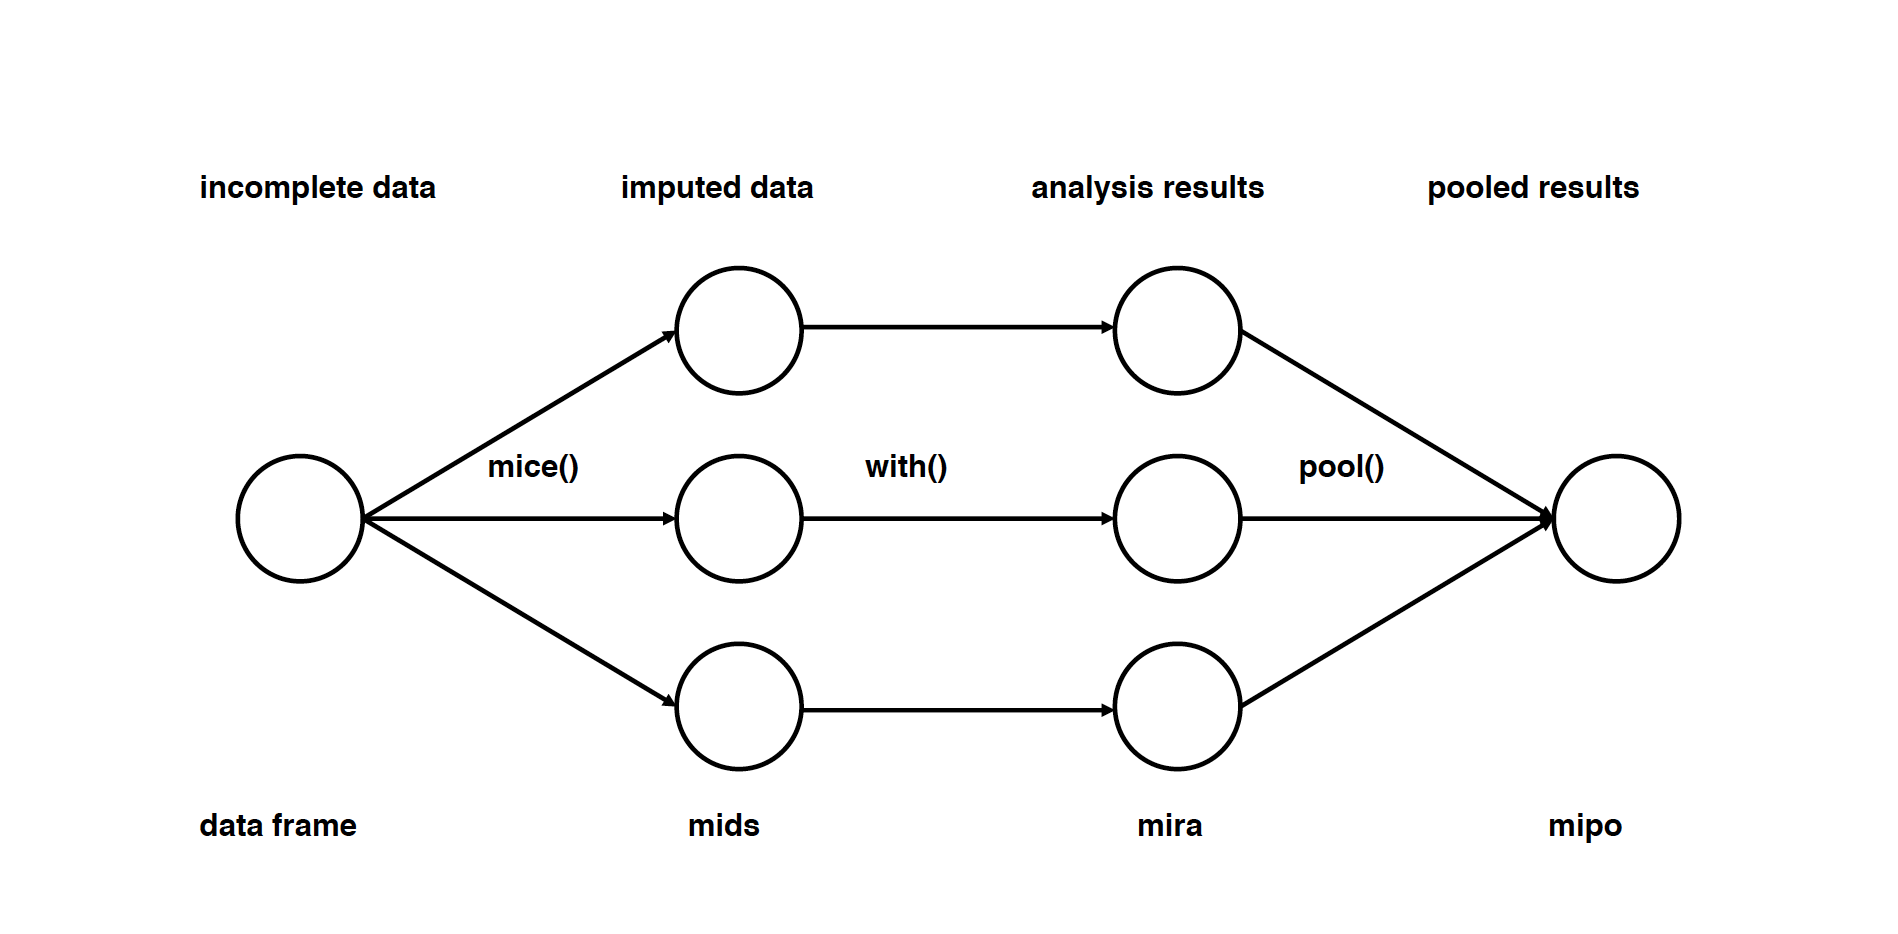

Este tipo de imputación funciona llenando los datos faltantes varias veces. Las imputaciones múltiples (IM) son mucho mejores que una sola imputación, ya que mide la incertidumbre de los valores perdidos de una mejor manera. El enfoque de ecuaciones encadenadas también es muy flexible y puede manejar diferentes variables de diferentes tipos de datos (es decir, continuos o binarios), así como complejidades como límites o patrones de omisión de encuestas.

La version de Sklearn no permite trabajar con variables de distinto tipo, hay que realizar encoding. 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())

melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt','BuildingArea']])



melb_data_mice.sample(10)
    

### Pros:

- Versatil, puede utilizarse con diferentes clases de clasificadores

### Cons

- La version de Sklearn no admite datos mixtos, debe realizarse un encoding primero.

### <span style="color:FireBrick">**2.2.3 Ejercicio: Dada las columnas del dataset que tienen datos faltantes,  imputarcon los siguientes estimadores**</span>
- BayesianRidge(),
- DecisionTreeRegressor(max_features='sqrt', random_state=0),
- ExtraTreesRegressor(n_estimators=10, random_state=0),
- KNeighborsRegressor(n_neighbors=15)

### <span style="color:FireBrick">**Decidir acciones**</span>


### 2.3.4 Otros métodos de imputación


- **miceforest: Fast Imputation with Random Forests in Python**

Fast, memory efficient Multiple Imputation by Chained Equations (MICE) with random forests. It can impute categorical and numeric data without much setup, and has an array of diagnostic plots available. 

https://github.com/AnotherSamWilson/miceforest#Using-miceforest

https://towardsdatascience.com/multiple-imputation-with-random-forests-in-python-dec83c0ac55b

- **MissForest missingpy library**

MissForest imputes missing values using Random Forests in an iterative fashion [1]. By default, the imputer begins imputing missing values of the column (which is expected to be a variable) with the smallest number of missing values -- let's call this the candidate column. The first step involves filling any missing values of the remaining, non-candidate, columns with an initial guess, which is the column mean for columns representing numerical variables and the column mode for columns representing categorical variables.

https://towardsdatascience.com/missforest-the-best-missing-data-imputation-algorithm-4d01182aed3


- **Datawig Imputation Using Deep Learning**

Este método funciona muy bien con características categóricas y no numéricas. Es una biblioteca que aprende modelos de aprendizaje automático utilizando redes neuronales profundas para imputar valores faltantes en un marco de datos. También es compatible con CPU y GPU para entrenamiento.

- **Stochastic regression imputation**

Es bastante similar a la imputación por regresión, que intenta predecir los valores perdidos haciendo una regresión de otras variables relacionadas en el mismo conjunto de datos, más algún valor residual aleatorio.

- **Extrapolation and Interpolation** 

Intenta estimar valores de otras observaciones dentro del rango de un conjunto discreto de puntos de datos conocidos.

- **Hot-Deck imputation**

Funciona eligiendo aleatoriamente el valor faltante de un conjunto de variables relacionadas y similares.


### Conclusion

 No existe una forma perfecta de compensar los valores perdidos en un conjunto de datos. Cada estrategia puede funcionar mejor para ciertos conjuntos de datos y tipos de datos faltantes, pero puede funcionar mucho peor en otros tipos de conjuntos de datos. Hay algunas reglas establecidas para decidir qué estrategia usar para tipos particulares de valores perdidos, pero más allá de eso, debe experimentar y verificar qué modelo funciona mejor para su conjunto de datos.

### Challenge

In [ ]:
from missingpy import MissForest
import sklearn.neighbors._base
sys.modules['sklearn.neighbors._base'] = sklearn.neighbors.base

X = melb_df.copy(deep=True)
imputer = MissForest()
X_imputed = imputer.fit_transform(X)

In [ ]:
import miceforest as mf
X = melb_df.copy(deep=True)
kernel = mf.MultipleImputedKernel(
  data=X,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)

completed_data = kernel.complete_data()
